# ⚡ Predição da Progressão do Diabetes com AdaBoost

## 🩺 Sobre o Dataset

Este projeto utiliza o **Diabetes Dataset** da biblioteca `scikit-learn`, contendo dados clínicos de pacientes, com o objetivo de prever a **progressão da doença** após um ano com base em exames médicos.

- **Variável-alvo (`target`)**:
  - Valor contínuo indicando a progressão da condição diabética.
  - Quanto maior o valor, mais grave a progressão estimada da doença.

---

## 🚀 Pipeline do Projeto

| Etapa | Descrição |
|-------|-----------|
| 📥 1. Carregamento | Importação do dataset diabetes |
| 📊 2. Análise Exploratória | `.head()`, `.info()`, `.describe()`, valores ausentes e correlações |
| 🔀 3. Split dos dados | Treino (80%) / Teste (20%) |
| 🔍 4. Cross-validation | GridSearch para otimizar `n_estimators`, `learning_rate` e `max_depth` |
| 🤖 5. Treinamento | Modelo `AdaBoostRegressor` com árvore base (`DecisionTreeRegressor`) |
| 📈 6. Avaliação | Cálculo de métricas + gráficos interpretativos |

---

## 📊 Régua Visual de Avaliação de Métricas de Regressão

| Métrica       | O que mede                                                  | Quando usar                                                  | Interpretação (Régua de Qualidade) |
|---------------|-------------------------------------------------------------|---------------------------------------------------------------|------------------------------------|
| **RMSE**      | Raiz do Erro Quadrático Médio                               | Quando penalizar **erros grandes** mais fortemente            | ✅ < 50 (baixo erro)<br>🟡 50–70 (médio)<br>🔴 > 70 (erro alto) |
| **MAE**       | Erro absoluto médio                                          | Para saber o erro **médio em unidades reais**                 | ✅ < 45 (baixo erro)<br>🟡 45–65 (ok)<br>🔴 > 65 (alto erro) |
| **R² (R-quadrado)** | Quanto da variância o modelo explica                       | Avaliação geral da **qualidade do ajuste**                    | ✅ > 0.80 (excelente)<br>🟡 0.60–0.80 (ok)<br>🔴 < 0.60 (fraco) |
| **R² CV**     | Média do R² via validação cruzada                           | Mede **generalização** para novos dados                       | Ideal se próximo do R² de teste    |

---

## 🧠 Dicas práticas para leitura

- **RMSE e MAE** devem ser **comparados com a escala do `target`** (no dataset, vai de ~25 a ~346).
- **RMSE > MAE** é comum, pois penaliza mais os erros extremos.
- **R² negativo** significa que o modelo está **pior que a média**.
- **R² CV** muito menor que o R² do teste pode indicar **overfitting**.
- Combine RMSE/MAE com gráficos de resíduos para entender onde o modelo erra mais.

📌 *Recomendado: RMSE < 60 e R² > 0.70 para modelos úteis nesse dataset.*

---

## 📘 Como Ler os Resultados

- **RMSE** mostra o erro médio com maior penalização para erros extremos.
- **MAE** mostra o erro médio real sem penalização elevada.
- **R² > 0.8** → o modelo explica bem a variabilidade dos dados.
- **Distribuição dos resíduos simétrica e centrada no zero** indica modelo balanceado.
- **Visualizações complementam as métricas** e revelam padrões ocultos nos erros.

---

## 📷 Visualizações Geradas

- 🔵 **Dispersão Real vs Predito** com linha ideal e de tendência
- 🟣 **Histograma de Resíduos** com linha média
- 🟠 **Comparação Ordenada Real vs Predito**
- 📊 **Gráfico de Barras com as Métricas** (RMSE, MAE, R², R² CV)

---

## 🛠️ Requisitos

```bash
pip install numpy pandas scikit-learn seaborn matplotlib



📌 VISÃO GERAL DO DATASET:

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

📌 INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   b

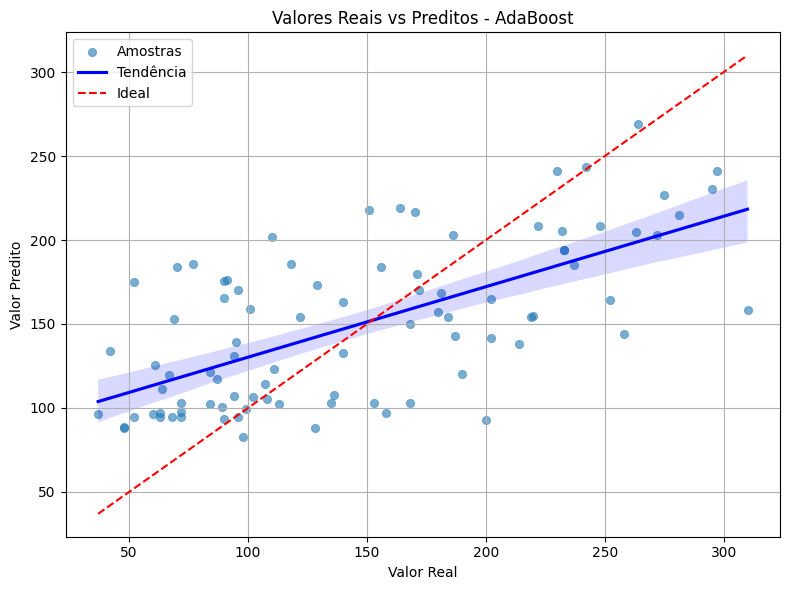

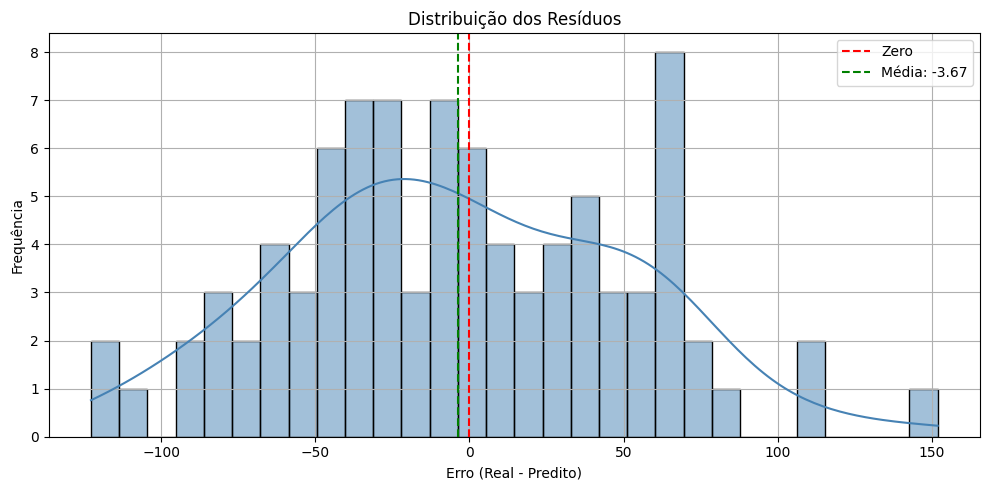

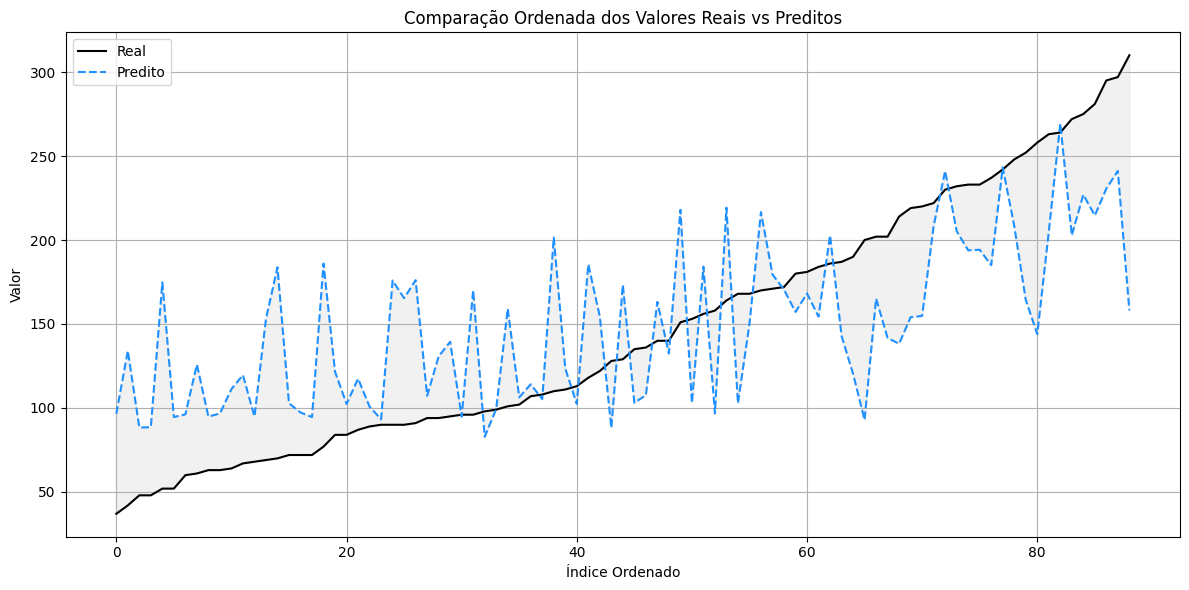

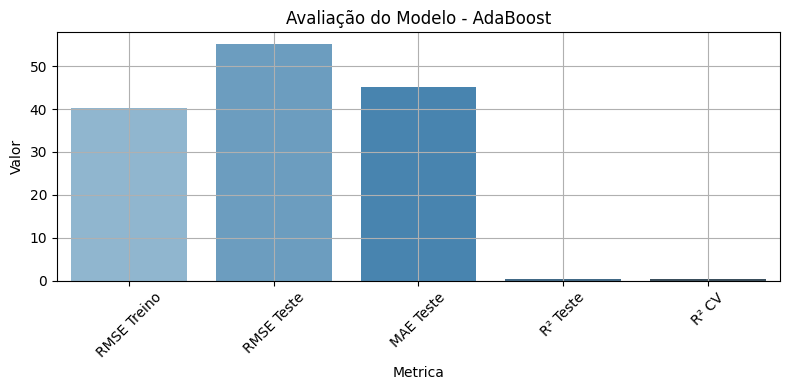

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 🔢 Carregando o dataset
dados = load_diabetes(as_frame=True)
X = dados.data
y = dados.target
df = dados.frame.copy()

# 📦 Data Preparation
print("\n📌 VISÃO GERAL DO DATASET:\n")
print(df.head())

print("\n📌 INFO:\n")
print(df.info())

print("\n📌 DESCRIÇÃO ESTATÍSTICA:\n")
print(df.describe())

print("\n📌 VALORES AUSENTES:\n")
print(df.isnull().sum())

print("\n📌 CORRELAÇÃO COM O TARGET:\n")
correlacoes = df.corr()["target"].sort_values(ascending=False)
print(correlacoes)

# 🔀 Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔧 Hiperparâmetros para GridSearch
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.3],
    "estimator__max_depth": [2, 3, 4]
}

# ⚙️ Modelo base + GridSearch
base_modelo = AdaBoostRegressor(estimator=DecisionTreeRegressor(), random_state=42)
grid = GridSearchCV(base_modelo, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)
melhor_modelo = grid.best_estimator_

# 🔮 Previsões
y_pred_train = melhor_modelo.predict(X_train)
y_pred_test = melhor_modelo.predict(X_test)

# 📏 Avaliação
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
cv_r2 = cross_val_score(melhor_modelo, X_train, y_train, cv=5, scoring="r2").mean()

# 📊 Métricas
print(f"\n🏆 Melhor combinação de parâmetros: {grid.best_params_}")
print(f"✅ RMSE (Treino): {rmse_train:.2f}")
print(f"✅ RMSE (Teste): {rmse_test:.2f}")
print(f"✅ MAE  (Teste): {mae_test:.2f}")
print(f"✅ R²   (Teste): {r2_test:.2f}")
print(f"📉 R² Médio (CV Treino): {cv_r2:.2f}")

# 📈 Gráfico 1: Dispersão Real vs Predito com linha de tendência
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6, edgecolor=None, label="Amostras")
sns.regplot(x=y_test, y=y_pred_test, scatter=False, color='blue', label='Tendência')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("Valores Reais vs Preditos - AdaBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📉 Gráfico 2: Distribuição dos Resíduos
residuos = y_test - y_pred_test
media_residuo = residuos.mean()

plt.figure(figsize=(10, 5))
sns.histplot(residuos, kde=True, bins=30, color='steelblue')
plt.axvline(0, color='red', linestyle='--', label='Zero')
plt.axvline(media_residuo, color='green', linestyle='--', label=f'Média: {media_residuo:.2f}')
plt.title("Distribuição dos Resíduos")
plt.xlabel("Erro (Real - Predito)")
plt.ylabel("Frequência")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📈 Gráfico 3: Comparação ordenada Real vs Predito
df_resultado = pd.DataFrame({"Real": y_test, "Predito": y_pred_test}).sort_values(by="Real").reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(df_resultado["Real"], label="Real", color="black")
plt.plot(df_resultado["Predito"], label="Predito", color="dodgerblue", linestyle="--")
plt.fill_between(df_resultado.index, df_resultado["Real"], df_resultado["Predito"], color='lightgray', alpha=0.3)
plt.xlabel("Índice Ordenado")
plt.ylabel("Valor")
plt.title("Comparação Ordenada dos Valores Reais vs Preditos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Gráfico 4: Comparação das Métricas
metricas_dict = {
    "RMSE Treino": rmse_train,
    "RMSE Teste": rmse_test,
    "MAE Teste": mae_test,
    "R² Teste": r2_test,
    "R² CV": cv_r2
}

metricas_df = pd.DataFrame({
    "Metrica": list(metricas_dict.keys()),
    "Valor": list(metricas_dict.values())
})

plt.figure(figsize=(8, 4))
sns.barplot(data=metricas_df, x="Metrica", y="Valor", hue="Metrica", palette='Blues_d', legend=False)
plt.title("Avaliação do Modelo - AdaBoost")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()